# <center> <div style="width: 370px;"> ![Linear Data Structure](pictures/Linear_Data_Structure.jpg)

# <center>Linear Data Structure

## Array Sequences and Memory Management

In the world of computer memory, resources are finite, and multiple processes often share the same memory. Operating systems allocate specific memory addresses to each active process based on their needs and available free memory.

When a program requests memory for a variable, it specifies how much memory it requires. The operating system allocates this memory within the process's address space, holding it until it's no longer needed. Though high-level languages like Python hide these details, they make behind-the-scenes requests for memory.

Imagine a scenario where a program needs to store two arrays, each with ten 64-bit words. The OS assigns memory chunks for these arrays. If the program later needs to add an eleventh word to the first array, it's not always feasible to do so within the existing space. A better approach is to request additional memory, copy the first array, add the new word, and release the old space.


The fundamental data structure here is a fixed-length array, like your computer's memory. It offers fast O(1) access but may take O(n) time for insertions and deletions.

# <center> <div style="width: 700px;"> 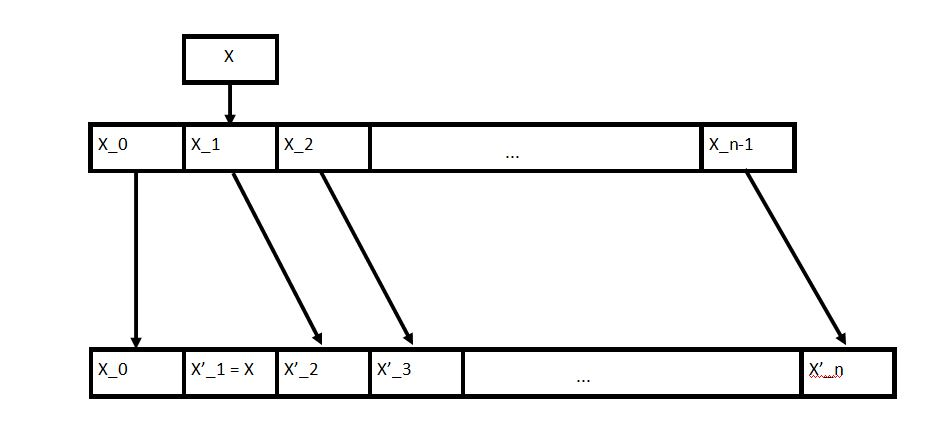

Example in python code
```python
class ArraySequence:
    def __init__(self):
        self.items = []

    def __len__(self):
        return len(self.items)

    def __getitem__(self, index):
        return self.items[index]

    def __setitem__(self, index, value):
        self.items[index] = value

    def insert_at(self, index, value):
        self.items.insert(index, value)

    def delete_at(self, index):
        if 0 <= index < len(self):
            return self.items.pop(index)
        else:
            raise IndexError("Index out of range")

    def append(self, value):
        self.items.append(value)

    def pop(self):
        if len(self) > 0:
            return self.items.pop()
        else:
            raise IndexError("Empty sequence")

    def insert_first(self, value):
        self.insert_at(0, value)

    def delete_first(self):
        return self.delete_at(0)

    def insert_last(self, value):
        self.append(value)

    def delete_last(self):
        return self.pop()
```
- The class is named ArraySequence for clarity.
- We use __getitem__ and __setitem__ methods to access and modify items by index, making it more intuitive.
- The insert_at and delete_at methods handle inserting and deleting items at a specific index, with error handling for out-of-range indices.
- append and pop methods are provided for adding and removing items from the end of the sequence.
- Methods for inserting and deleting items at the beginning and end of the sequence (insert_first, delete_first, insert_last, and delete_last) are included for teaching convenience.

**in summary:***
Array is great for static operations! get at(i) and set at(i, x) in Θ(1) time! 
- But not so great at dynamic operations... 
- (For consistency, we maintain the invariant that array is full) 
- Then inserting and removing items requires: 
    - reallocating the array 
    - shifting all items after the modified item 


#### Code Challenge

Finding an Elenet in an Arbitrary Array List

``` C++
bool find(vector<int> arr, int n) {
    bool test;
    test = false;
    for(int i = 0; i != arr.size(); ++i)
    {
        if(arr[i] == n )
        {
            return i;
            test = true;
            break;
        }
    }
    if(!test)
        return false;
}
```

## Linked List Sequence

A ***linked list*** represents a distinct type of data structure. Rather than reserving a contiguous block of memory for storing items, a linked list employs nodes, each being a fixed-size container with two key properties: `node.item` stores the item itself, and `node.next` holds the memory address of the node that contains the next item in the sequence.

These structures are often referred to as pointer-based or linked structures, and they offer a level of flexibility not found in array-based data structures. In a linked list, the individual items can be dispersed anywhere in memory. The linked list maintains a reference to the node that holds the first element of the list, which is known as the "head" of the list. Additionally, it keeps track of the linked list's size, representing the number of items contained within it.

One significant advantage of linked lists is their ease of adding items to the list, especially when inserting an item after another. Achieving this involves simply updating memory addresses, a process known as relinking pointers. Notably, appending a new item to the front (head) of the list can be done in constant time, denoted as O(1).

However, there is a trade-off to consider. When searching for the i-th item in the sequence, one must traverse the items sequentially, leading to a worst-case linear time complexity for both the "get at" and "set at" operations.



#### Challenge Code

Finding an Element in a Linked List
Write a function `find(Node* node, int element)` that starts at the given node and either returns true if the element exists somewhere in the Linked List, otherwise false if the element does not exist in the Linked List. You may choose to implement it either iteratively or recursively: we will pass in the head node when we call your find function, so both approaches have equally valid solutions.

Solution:

``` C++
bool find(Node* node, int element) {
    bool test;
    test = false;
    while( node != NULL ) {
        if( node->value == element ) {
            test = true;
            return test;
            break;
        }
        else
            node = node->next;
    }
    if(!test)
            return test;
}
```

# <center> <div style="width: 700px;"> 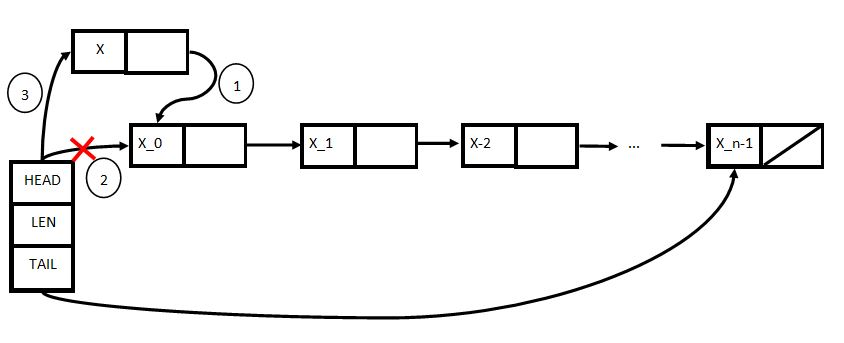

```python
class ListNode:
    def __init__(self, value):
        self.value = value
        self.next_node = None

    def get_node_at(self, position):
        if position == 0:
            return self
        elif self.next_node is not None:
            return self.next_node.get_node_at(position - 1)
        else:
            return None
```

#### notes:
- Pointer data structure (this is ***not*** related to a Python “list”)
- Each item stored in a ***node*** which contains a pointer to the next node in sequence
- Each node has two fields: node.item ***and*** node.next
- Can manipulate nodes simply by relinking pointers!
- Maintain pointers to the first node in sequence (called the head)
- Can now insert and delete from the front in Θ(1) time! Yay!
- (Inserting/deleting efficiently from back is also possible; you will do this in PS1)
- But now get at(i) and set at(i, x) each take O(n) time... :(
- Can we get the best of both worlds? Yes! (Kind of...) 


### Dynamic Array


Dynamic arrays, like array A, often incur linear time costs when adding elements, which begs the question: can we avoid this linear overhead? One approach is to over-allocate space when creating an array, allowing for constant-time insertions by copying elements to the next available slot. While this tradeoff trades extra space for speed, it's not unlimited, and repeated insertions can lead to reallocation.
Python's List doesn't always guarantee O(1) time for append. Occasionally, it takes O(n) to transfer to a larger memory allocation. However, strategic allocation ensures that a sequence of n insertions averages O(1) time, known as "amortized constant time," where costs are spread across operations.
To achieve this, extra space is allocated in proportion to array size. Allocating O(n) additional space ensures a linear number of insertions before overflow. Python Lists use a formula to allocate additional space, maintaining a modest overhead but achieving amortized constant time.
What about removing items from the end? Popping is usually constant time, but excess allocation may waste memory. When the array shrinks sufficiently, a smaller allocation is used, ensuring constant amortized running time for sequences of appends or pops.


#### notes: 

- Make an array efficient for ***last*** dynamic operations
- Python `list` is a dynamic array
- ***Idea!*** Allocate extra space so reallocation does not occur with every dynamic operation
- ***Fill ratio:*** 0 ≤ r ≤ 1 the ratio of items to space
- Whenever array is full (r = 1), allocate Θ(n) extra space at end to fill ratio $ r_i $
- Will have to insert Θ(n) items before the next reallocation
- A single operation can take Θ(n) time for reallocation
- However, any sequence of Θ(n) operations takes Θ(n) time
- So each operation takes Θ(1) time `on average` 

### Amortized Analysis

- Data structure analysis technique to distribute cost over many operations
- Operation has amortized cost T(n) if k operations cost at most ≤ kT(n)
- `T(n) amortized` roughly means T(n) `on average` over many operations
- Inserting into a dynamic array takes Θ(1) amortized time 

### Comparison of data structures that have been reviewed so far

|Data Structure|Operations O(.)|Operations O(.)       |Operations O(.)               |Operations O(.)             |Operations O(.)             |
|--------------|---------------|----------------------|------------------------------|----------------------------|----------------------------|
|              |Container      |Static                |Dynamic                       |Dynamic                     |Dynamic                     |
|              |build(X)       |get_at(i)/set_at(i, x)|insert_first(x)/delete_first()|insert_last(x)/delete last()|insert at(i, x)/delete_at(i)|
|Array|<center>n|<center>1|<center>n|<center>n|<center>n|
|Linked List|<center>n|<center>n|<center>1|<center>n|<center>n|
|Dynamic Array|<center>n|<center>1|<center>n|:=$$ 1_{(a)} $$ |<center>n|